## Section 8: Principal Component Analysis with NumPy and SciPy

### Principal Component Analysis

#### What is PCA?
If you do a Google search, you'll find a lot of definitions for principle component analysis.  

* "An unsupervised learning technique" (a "machine learning aficionado's definition"; well true, but not relevant yet).  

* "[A] dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set" (Yes, but it does more than just make your life easier).

* "[A] statistical procedure that allows you to summarize the information content in large data" (yes, but vague?)

In truth, PCA is all these things.  I would define PCA in terms of its literal mathematical formation and its practical consequence:

* "PCA finds an orthonormal basis for the k-dimensional subspace (k $\le$ K) in a matrix of full-rank K that maximizes the sum-of-squares
of the projected data [represented in said matrix]. " (a riff on the definition given by Dr. Jonathan Pillow, statistician at Princeton)

* ... " that allows you to identify patterns/correlations that explain said data and compare their importance". In other words, the principal components are a mathematical way of describing the correlations that we see in data with a high number of dimensions/features.  

 If you have some data and only have, say, one attribute that is varied (i.e. the data are a function only of one variable) then modeling the data should be pretty straightforward.  But what about if you have 3 attributes?  Or 30? Or 3,000?   And they are all acting on the same data set.  PCA allows you to sift through these, identify the ones that explain the data the most, second most, third most, etc.

So anyway the first part of the definition is basically saying PCA is a geometrical transformation to a more useful "coordinate" system (blahblahblah finding an orthonormal basis).  We introduced this concept in the previous section on eigendecomposition.

This is a key point but what do we really mean by that?   Here's a demonstration.  

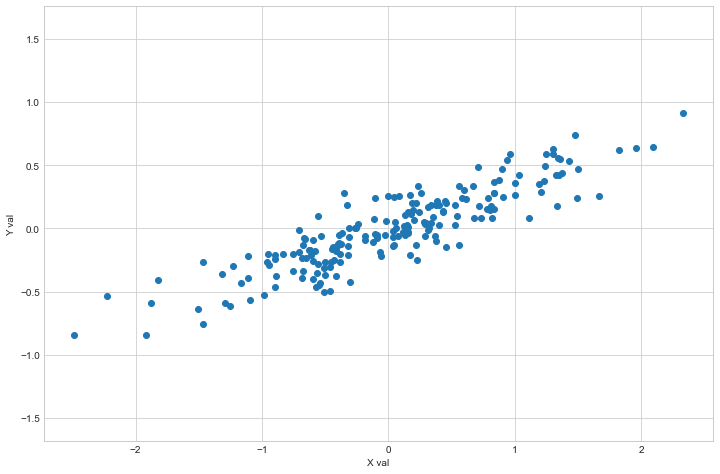

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8] #to make the figures larger in Jupyter
plt.style.use('seaborn-whitegrid')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.xlabel('X val')
plt.ylabel('Y val')
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

By eye, it is clear that there is a nearly linear relationship between the x and y variables.   You imagine a linear equation y = mx+b plus some noise being reproduced here.  

That's great, but there's actually more information here and we can find it if we do a coordinate transformation.  Instead of having x and y coordinates, we have "fake x" and "fake y" coordinates, which we gain from a rotation of axes.   When we do so, we align the dominant trend along one axis and the "residuals" along the other.   We will learn later how to do this ("construct principal components") manually, but for now let's "cheat" by using ``scikit-learn"'s module that does all the work for us.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the components and explained variance:

In [18]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the components to define the direction of the vector and the explained variance to define the squared length of the vector (see the following figure):

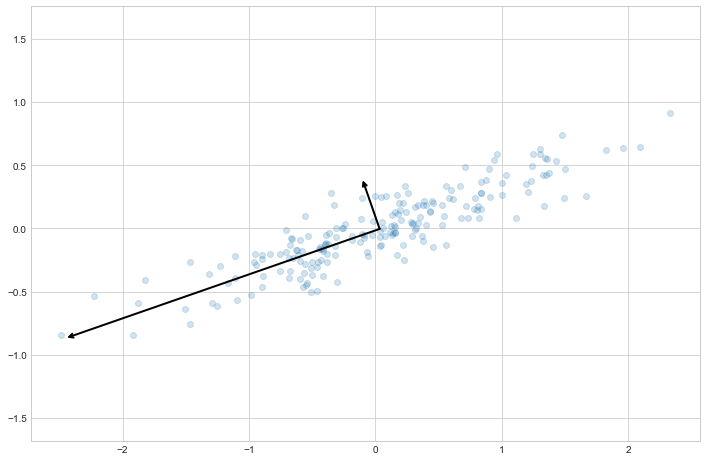

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

These vectors represent the principal axes of the data, and the length of each vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. So the longer arrow is the most important vector; the shorter one is second in importance.  The projection of each data point onto the principal axes are the _principal components_ of the data.

If we plot these principal components beside the original data, we see the plots shown in the following figure:

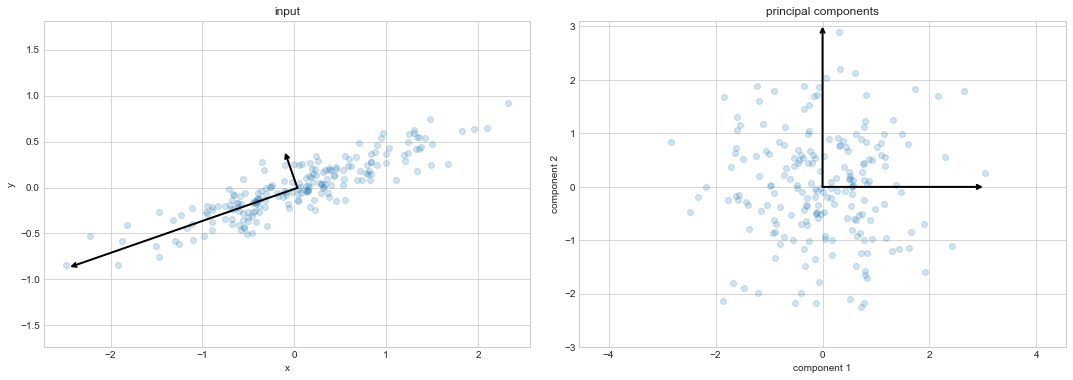

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

plt.show()


#### PCA as Dimensionality Reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. (or colloquially and crudely "getting rid of **** that isn't important" to focus on what is).

Here is an example of using PCA as a dimensionality reduction transform:

In [21]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print("original shape: ", X. shape)

print("transformed shape: ",X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data 

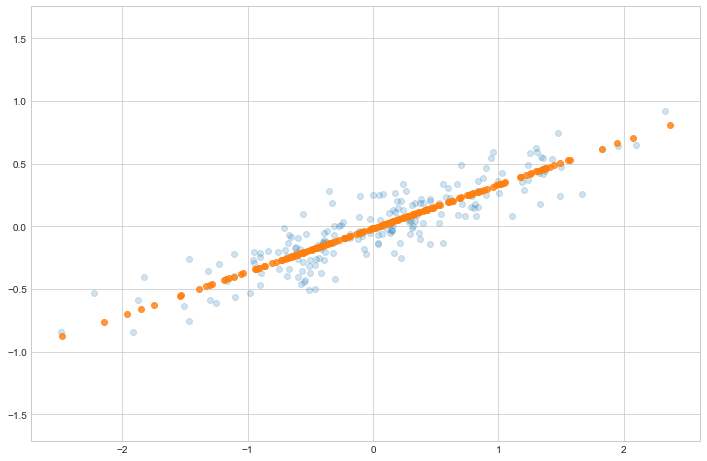

In [22]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show()

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in the preceding figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the number of data features by 50%, the overall relationships between the data points are mostly preserved.

#### "Doing" Principal Component Analysis 

In the preceding example, we cheated a bit by using the SciKit-Learn implementation of PCA, which basically just has you press a button and get "PCA" in return.  That doesn't tell you how you actually perform this analysis in the first place.  Now, we will do PCA from scratch, so you understand what is in the black box.

There are several steps to doing PCA.

1 -- **Mean-Center the Data (Matrix)**, $\bar{M}$ = $M$ - mean($M$).   This means subtract the mean value of the data along each original dimension.   The dataset should be "centered" on the origin.  E.g. ``data_mat_meansubbed = data_mat-np.mean(data_mat,axis=0)``.  

2 -- **Compute the Covariance Matrix**.  The covariance matrix of a matrix with dimensions $m$x$n$ is that matrix multiplied by its transpose $a a^{T}$.     NumPy has a built-in function to do this: ``np.cov``, though I usually do mine with ``np.matmul``, where one matrix is the input matrix and another is its transpose.  E.g. ``cov=np.matmul(data_mat_meansubbed.T,data_mat_meansubbed)`` or ``cov=np.cov(data_mat_meansubbed,rowvar=False)``.  Be wary of the units: the documentation for ``np.cov`` gives a good guide for what the _intent_ of this calculation is all about.  E.g. for a set of images, the rows and columns correspond to image number (in the sequence) and pixel coordinates.  If you have 50 images and 100 pixels then your covariance matrix should be a square matrix of 50x50.

3 -- **Eigen-decompose the covariance matrix** to yield the eigenvectors and eigenvalues.  This is done (in NumPy) as ``np.linalg.eigh([name of covariance matrix])``.   E.g. ``eig_val, eig_vec = np.linalg.eigh(cov)``.

 Note that other people use ``np.linalg.eig``, which is fine for non-square matrices.  But this decomposition only works with square matrices and ``eig`` doesn't rank-order the eigenvalues/vectors by contribution.  Which brings us to ...
 
4 -- **Sort the Eigenvalues and Eigenvectors from largest to smallest**.  If you use ``np.linalg.eigh``, the easiest way to do this is something like the following:

```
indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
```

5 -- **Select Number of Principal Components to Retain, Compute Principal Components** .  First, select the number of PCs to retain.   Let's say you have a covariance matrix that is 50x50.   You can model the data by up to 50 principal components.  To choose the first 5 principal components to explain the data, you then slice on the eigenvector and eigenvalue variables.  E.g. for retaining _npca_ principal components, you perform something like the following:

``eig_vec=eig_vec[:,:npca]`` and ``eig_val=eig_val[:npca]``.  

Then finally you multiply the original mean-subtracted matrix by the eigenvectors: i.e. $PC$ = $\textbf{M}$$\textbf{V}$.

In Python this operation looks like the following:

``pca_data = data_mat_meansubbed.dot(eig_vec)``.   

And that's it!

... except one more optional step.

6 -- **Reconstructing the Data with PCA** -- If you then want to reconstruct the data itself to see how well PCA reproduces the data, you simply take the _inverse_ transform and add the original data mean to recover the _approximated_ (or modeled or estimated ... whatever term you want) data that is _reconstructed_ from principal components.  

E.g. ``data_mat_est = pca_data.dot(eig_vec.T)+np.mean(data_mat,axis=0)``


To demonstrate PCA from scratch, we are going to create a mock 10-D data set.   The data set consists of 1000 random draws from a gaussian distribution with a mean value of 3 $\pm$ a randomly chosen number along each dimension.  The width of the gaussian is varied along each dimension, made especially big along the first two dimensions.  We introduce a non-zero _covariance_ in the width ($\sigma$) along different dimensions so our data doesn't nicely separate along x,y,z ...10-d to begin with.   

The source code is found in ``pcademo3.py`` under the function aptly named ``runme``.  We break up this program into chunks below with some commentary.

Data shape  (1000, 10)
Explained variance  [0.67680664 0.10910582 0.04569034 0.04183293 0.0346369  0.03214746
 0.02076901 0.01783582 0.01546529 0.00570978]
Cumulative variance  [0.67680664 0.78591247 0.83160281 0.87343574 0.90807264 0.9402201
 0.96098911 0.97882492 0.99429022 1.        ]


/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_33418/3040277897.py:24: RuntimeWarning: covariance is not positive-semidefinite.
  org_data = rnd.multivariate_normal(mu, sigma, size=(1000))


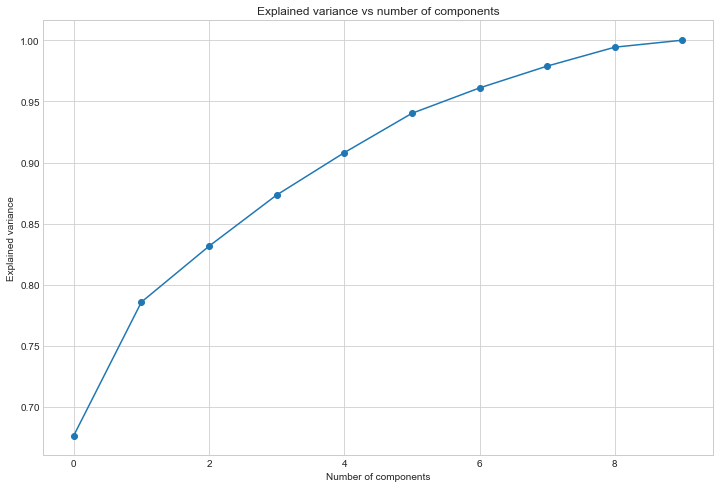

In [26]:
 import numpy as np
 import numpy.random as rnd

 import matplotlib.pyplot as plt

#def runme(npca=5,plotrelpc=True,plotorigvspc=True):

 npca=5
    
#####Setting Up
 ndim = 10
 mu = np.array([3]+np.random.rand(ndim)) # Mean
 sigma=np.full((ndim,ndim),5+np.random.rand(ndim*ndim).reshape(ndim,ndim))

#some trickery to adjust the relative PCs to an interesting range of values
 sigarr=5+np.arange(0,ndim)*0.5
 sigarr[0:2]=np.array([15,7.5])
 np.fill_diagonal(sigma,sigarr)

# print("Mu ", mu.shape)
# print("Sigma ", sigma.shape)

 # Create 1000 samples using mean and sigma
 org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
 print("Data shape ", org_data.shape)


 ##### Step 1 -  Subtract mean from data
 mean = np.mean(org_data, axis= 0)
# print("Mean ", mean.shape)

 mean_data = org_data - mean
# print("Data after subtracting mean ", org_data.shape, "\n")


 #cov = np.cov(mean_data.T)
 #cov = np.cov(mean_data,rowvar=False)

#### Step 2 - Computing the Covariance Matrix
 cov=np.matmul(mean_data.T,mean_data)

 #print("Covariance matrix ", cov.shape, "\n")


#### Step 3 - Eigendecomposition
 eig_val, eig_vec = np.linalg.eigh(cov)

# print("Eigen vectors ", eig_vec.shape)
# print("Eigen values ", eig_val.shape, "\n")


#### Step 4 - Sort the Eigenvalues and Eigenvectors, large to small
 indices = np.argsort(eig_val)[::-1]

 eig_val = eig_val[indices]
 eig_vec = eig_vec[:,indices]


###some analysis
 # Get explained variance
 sum_eig_val = np.sum(eig_val)
 explained_variance = eig_val/ sum_eig_val

 print("Explained variance ", explained_variance)
 cumulative_variance = np.cumsum(explained_variance)
 print("Cumulative variance ", cumulative_variance)

 plotrelpc=True
 if plotrelpc:
  # Plot explained variance
  plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance,marker='o')
  plt.title("Explained variance vs number of components")
  plt.xlabel("Number of components")
  plt.ylabel("Explained variance")
  plt.show()

####end some analysis




Focus on the first plot shown (above).  This is simply a plot of the "explained variance" as a function of PC.   Basically, how much variance is contained in each principal component?   From this plot, we see that a single principal component contains about 70% of the total variance in the entire data set.   The 2nd one contains abuot 10%, the third 5%, and so on.   The cumulative variance seems to approach a horizontal line as we approach 10 principal components. 

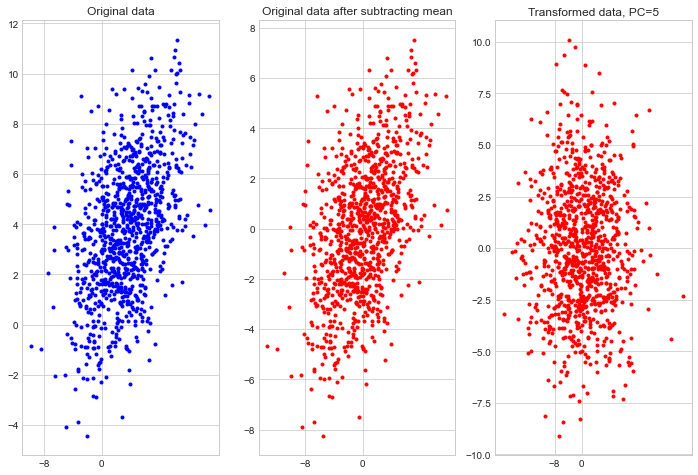

In [29]:
 #### Step 5a - Select number of PCs to compute ...
 ## We will retain npca components
 n_comp = npca
 eig_vec = eig_vec[:,:n_comp]
 eig_val=eig_val[:n_comp]
# print(eig_vec.shape)


#### Step 5b - Compute the PCs
 # Take transpose of eigen vectors with data --> get PCs
 pca_data = mean_data.dot(eig_vec)

#### Analysis
 # Plot data

 plotorigvspc=True
 if plotorigvspc:
  fig, ax = plt.subplots(1,3, figsize= (12,8))
  # Plot original data
  ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

  # Plot data after subtracting mean from data
  ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

  # Plot data after subtracting mean from data
  ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

  # Set title
  ax[0].set_title("Original data")
  ax[1].set_title("Original data after subtracting mean")
  ax[2].set_title("Transformed data, PC="+str(npca))

  # Set x ticks
  ax[0].set_xticks(np.arange(-8, 1, 8))
  ax[1].set_xticks(np.arange(-8, 1, 8))
  ax[2].set_xticks(np.arange(-8, 1, 8))

  # Set grid to 'on'
  ax[0].grid('on')
  ax[1].grid('on')
  ax[2].grid('on')

  #major_axis = eig_vec[:,0].flatten()
  xmin = np.amin(pca_data[:,0])
  xmax = np.amax(pca_data[:,0])
  ymin = np.amin(pca_data[:,1])
  ymax = np.amax(pca_data[:,1])

  plt.show()
  plt.close('all')

Now look at the next plot above comparing the original data along the first two dimensions, the mean-subtracted data, and the "transformed" data (i.e. transformed to a new basis ... the PC basis consisting of 3 principal components).  The slope in the original data?   It's gone in the PC plot: we just see some dispersion perfectly along the two PC axes.


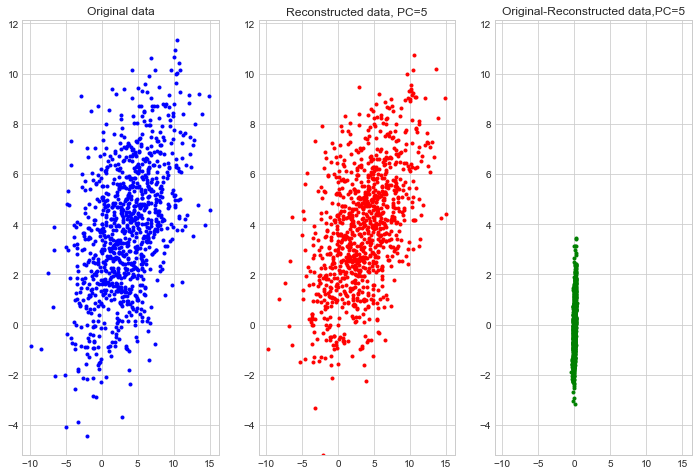

In [30]:
 #### Step 6 - Reconstruct Original Data from PCs
 # Reverse PCA transformation
 recon_data = pca_data.dot(eig_vec.T) + mean

#print(recon_data.shape)


 fig, ax = plt.subplots(1,3, figsize= (12, 8))
 ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
 xl=ax[0].get_xlim()
 yl=ax[0].get_ylim()

 ax[1].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
 ax[1].set_xlim(xl)
 ax[1].set_ylim(yl)

 ax[2].scatter(org_data[:,0]-recon_data[:,0], org_data[:,1]-recon_data[:,1], color='green', marker='.')
 ax[2].set_xlim(xl)
 ax[2].set_ylim(yl)

 ax[0].set_title("Original data")
 ax[1].set_title("Reconstructed data, PC="+str(npca))
 ax[2].set_title("Original-Reconstructed data,PC="+str(npca))
 ax[0].grid('on')
 ax[1].grid('on')
 ax[2].grid('on')
 plt.show()
 #plt.close('all')

Finally, this plot.   Compare the blue vs red trend and then the residuals (in green).  The reconstructed data are a pretty good representation except that the y axis is elongated and there's an ever-so-slight tilt in the residuals going left to right.   Now, let's gradually bring up the number of PCs removed.


![](./figures/Figure_pcademo7b.png)

To run, you go into the directory and do ``from pcademo3 import run me`` and then ...

``runme(plotorigvspc=True,plotrelpc=True,npca=5)`` (5 PCs)

![](./figures/Figure_pcademo7c.png)

``runme(plotorigvspc=True,plotrelpc=True,npca=8)`` (8 PCs)

If we run this with 10 principal components retained we fully recover the original data.

Okay, great but if we can just model the data perfectly by retaining all PCs, why do we ever want to truncate the PC basis for anything?   Well, the answer rests largely in applications of PCA.  What if instead of the contrived model I made, the data are instead "noisy" (and they are ALWAYS noisy)?   E.g. if we have a bunch of images. 